In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv( 'dataset_heart12.csv' )
df1=df
df1 = pd.get_dummies(df1, columns=['heart disease'], drop_first=True)
df1.rename(columns={'heart disease_Presence':'heart disease'}, inplace=True)
df1.rename(columns={'Thallium':'Thalesemia'},inplace=True)


In [3]:
#to check number column in dataframe df1
df1.head()


,age,sex,chest pain type,BP,cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,ST depression,ST segment,number of vessels fluro,thalesemia,heart disease_2
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [4]:
# To Check presence of NA or NULL values if any in data
# To do so i will be using isna() inbuilt function in python and sum() function to get t
df1.isna().sum()

age                                     0
sex                                     0
chest pain type                         0
BP                                      0
 cholestoral                            0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
ST depression                           0
ST segment                              0
 number of  vessels fluro               0
thalesemia                              0
heart disease_2                         0
dtype: int64

<Figure size 1000x900 with 0 Axes>

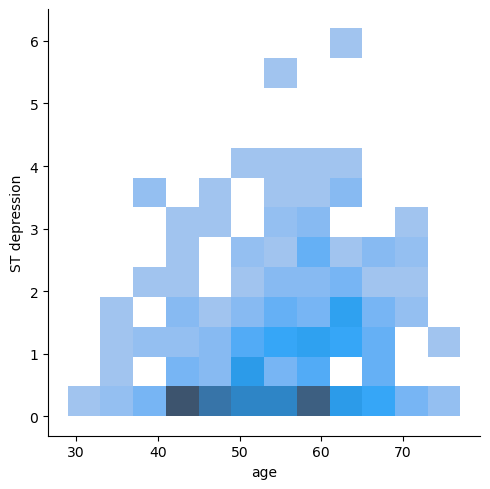

In [5]:
plt.figure(figsize=(10,9))
sns.displot(df1,x='age',y='ST depression')


<Figure size 500x500 with 0 Axes>

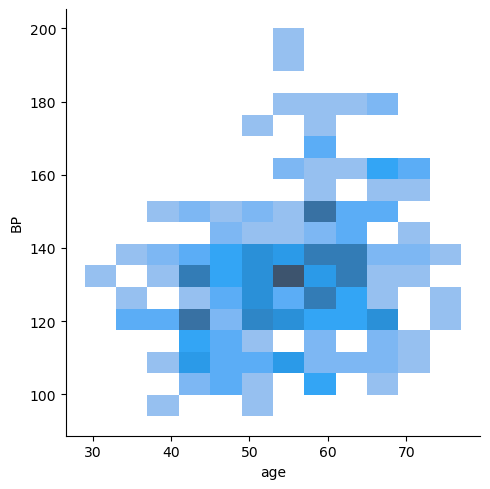

In [6]:
plt.figure(figsize=(5,5))
sns.displot(df1,x='age',y='BP')



<Axes: xlabel='chest pain type', ylabel='ST depression'>

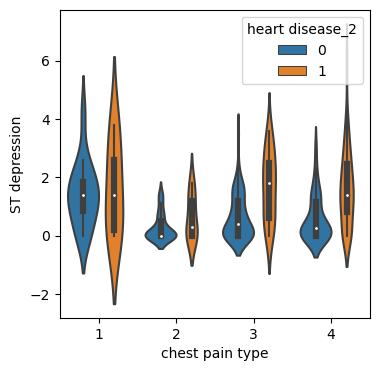

In [7]:
plt.figure(figsize=(4,4))
sns.violinplot(data=df1,x='chest pain type',y='ST depression',hue='heart disease_2')

<Axes: xlabel='exercise induced angina', ylabel='ST depression'>

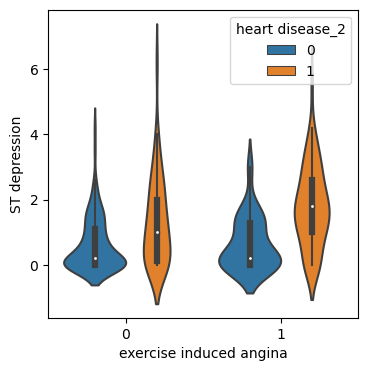

In [8]:
plt.figure(figsize=(4,4))
sns.violinplot(data=df1,x='exercise induced angina',y='ST depression',hue='heart disease_2')


<Axes: xlabel='chest pain type', ylabel='max heart rate'>

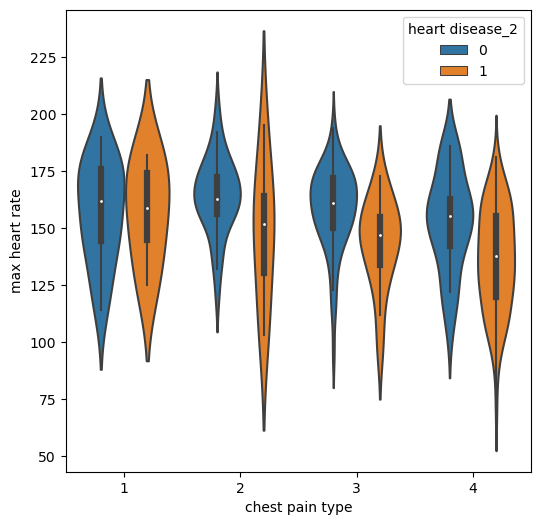

In [9]:
plt.figure(figsize=(6,6))
sns.violinplot(data=df1,x='chest pain type',y='max heart rate',hue='heart disease_2')

<Axes: xlabel='chest pain type', ylabel='ST depression'>

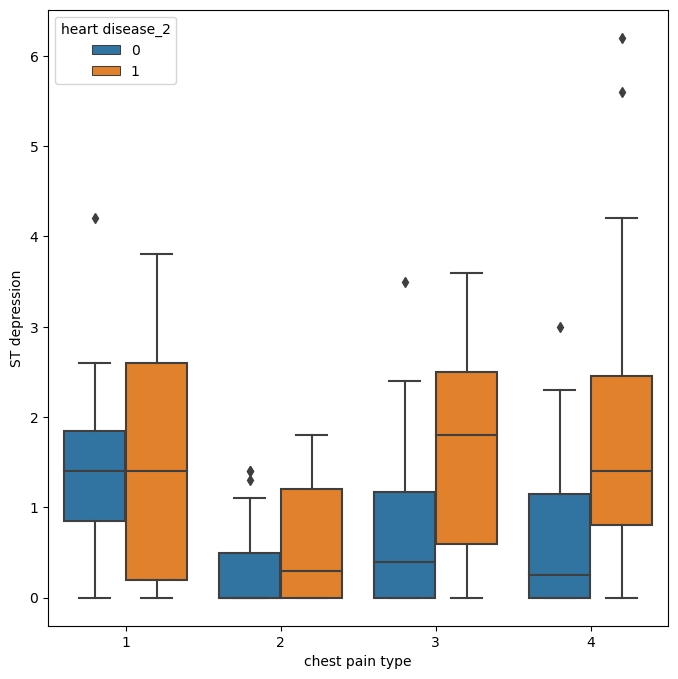

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df1,x='chest pain type',y='ST depression',hue='heart disease_2',dodge=True )

<Axes: xlabel='ST depression', ylabel='heart disease_2'>

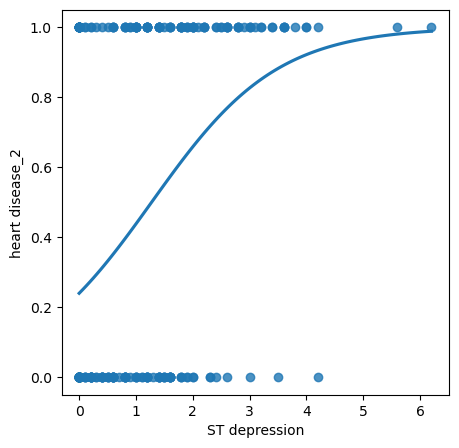

In [11]:
plt.figure(figsize=(5,5))
x=df1['ST depression']
y=df1['heart disease_2']
sns.regplot(x=x, y=y, data=df1, logistic=True, ci=None)

<Axes: xlabel='max heart rate', ylabel='heart disease_2'>

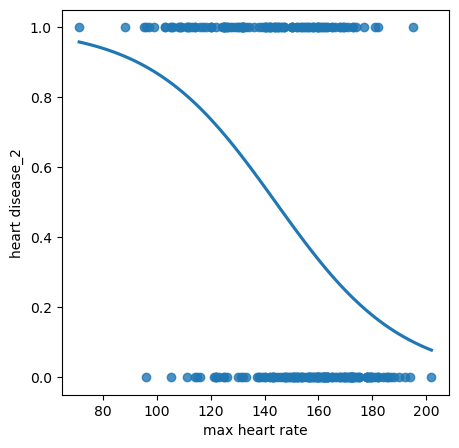

In [12]:
plt.figure(figsize=(5,5))
x=df1['max heart rate']
y=df1['heart disease_2']
sns.regplot(x=x, y=y, data=df1, logistic=True, ci=None)


<Axes: xlabel='ST segment', ylabel='heart disease_2'>

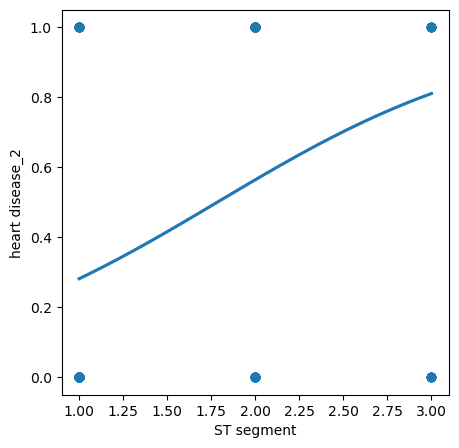

In [13]:
plt.figure(figsize=(5,5))
x=df1['ST segment']
y=df1['heart disease_2']
sns.regplot(x=x, y=y, data=df1, logistic=True, ci=None)

<Axes: xlabel='age', ylabel='heart disease_2'>

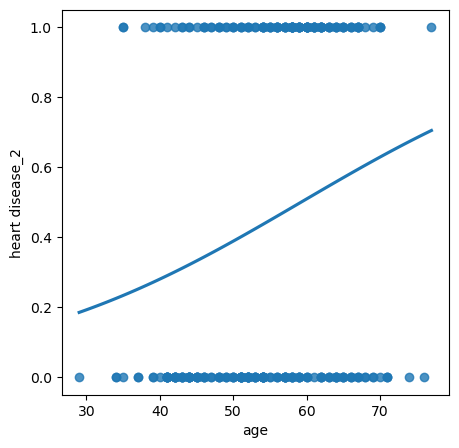

In [14]:
plt.figure(figsize=(5,5))
x=df1['age']
y=df1['heart disease_2']
sns.regplot(x=x, y=y, data=df1, logistic=True, ci=None)

<Axes: xlabel='thalesemia', ylabel='heart disease_2'>

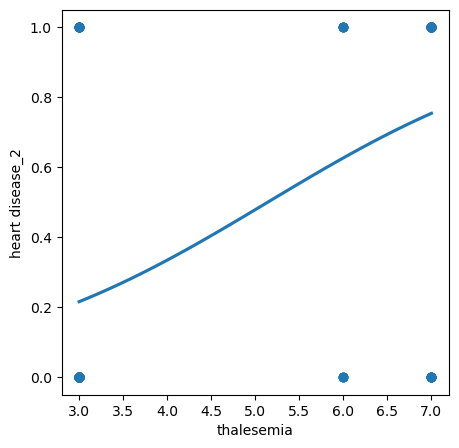

In [15]:
plt.figure(figsize=(5,5))
x=df1['thalesemia']
y=df1['heart disease_2']
sns.regplot(x=x, y=y, data=df1, logistic=True, ci=None)


<Axes: >

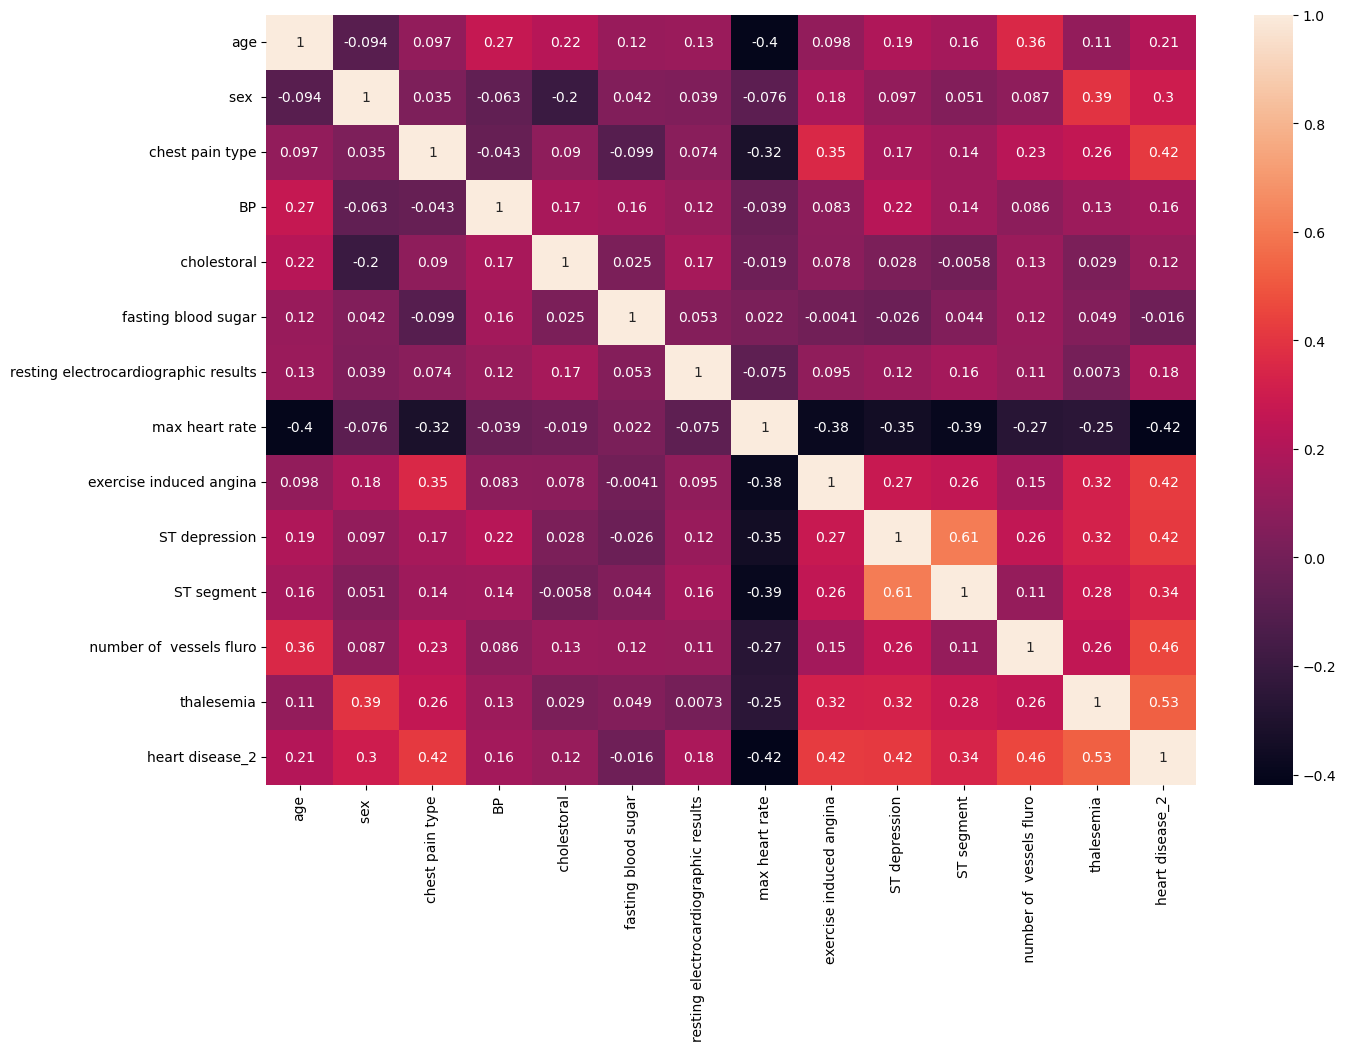

In [16]:
#To look for pairwise corelation among all variable we will be using heatmaap from sea b

plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

AdaBoost Classifier Model Accuracy: 0.7407407407407407
The accuracy Score of Heart Disease %s <built-in method round of numpy.float64 object at 0x00000205A02EB190>


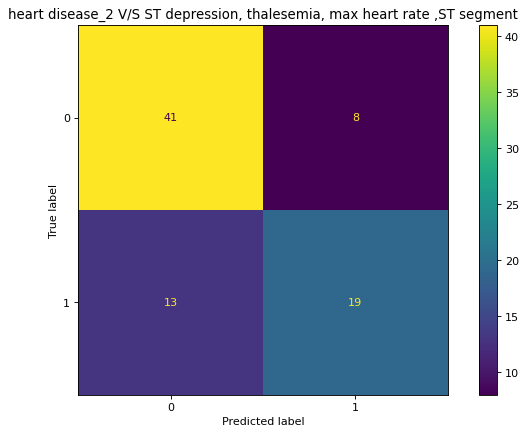

In [17]:
# Lets check the accuracy with ADA boast classifier and classify the data 
X1=df1[['ST depression','thalesemia','max heart rate','ST segment']]
y1=df1['heart disease_2']
#With sklearn.model_selection.train_test_split I will be creating 4 portions of data whi
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=42)
#Create adaboost classifer object
abc = AdaBoostClassifier( random_state=1)
model = abc.fit(X_train,y_train)
# predict the response to test data
prediction = model.predict(X_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, prediction))
#Creating Confusion matrix 
confusion_matrix1=metrics.confusion_matrix(y_test, prediction)
confusion_matrix1
print('The accuracy Score of Heart Disease %s',accuracy_score(y_test, prediction).round )
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10,6), dpi=80)
display = ConfusionMatrixDisplay(confusion_matrix1)
ax.set(title='heart disease_2 V/S ST depression, thalesemia, max heart rate ,ST segment')
display.plot(ax=ax);